> # **Customer Purchasing Behaviour Analysis Project**



> ## **Introduction :**

As a member of Company's retail analytics team, I have been approached by the Category Manager for Chips to conduct a comprehensive analysis of customer purchasing behavior for this product category.

This analysis is crucial as it will offer insights into the different types of customers purchasing chips, their buying patterns, and how these behaviors vary across the region. By understanding these nuances, the client aims to make informed strategic decisions for the upcoming review of the Chips category, ensuring that the supermarket's offerings are aligned with customer preferences and market trends.

> # **Purpose :**


The primary objective of this project is to analyze the transaction and customer data related to the **Chips category, with a focus on uncovering key customer segments and their unique purchasing behaviors**. By conducting a thorough examination of the data, we aim to identify trends, patterns, and correlations that highlight how different customer groups interact with the Chips category. This involves assessing the frequency of purchases, average spend, preferred product types, and any seasonal variations in buying behavior.

Additionally, the analysis will involve a deep dive into transaction data to clean and identify any anomalies or outliers, ensuring that our insights are based on accurate and reliable information. This is followed by a detailed segmentation of customers based on their purchase history, demographics, and spending habits.

The insights derived from this analysis will inform a set of strategic recommendations that the Category Manager can use to guide their decisions for the upcoming category review. These recommendations will be tailored to address the needs of high-value customer segments, optimize product placement, and enhance promotional strategies. Ultimately, the goal is to support the supermarket in aligning its product offerings with customer demand, maximizing sales and profitability within the Chips category over the next six months.

In [250]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

> ## **Transaction data**

In [277]:
# Importing Transaction data
tra=pd.read_excel("/content/QVI_transaction_data.xlsx")
tra.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [278]:
tra.shape #data table structure (Rows and columns)

(264836, 8)

In [279]:
tra.info()  #look at the format of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


> ### **EDA and Data Transformation for Transaction data :**

In [280]:
# As date column is in integer for changing data type to date format
tra['DATE'] = pd.to_datetime(tra['DATE'], unit='D', origin='1899-12-30')

# unit='D': SPECIFIES THAT THE VALUES IN tra['DATE'] ARE IN DAYS. EACH VALUE REPRESENTS A NUMBER OF DAYS SINCE THE SPECIFIED ORIGIN DATE.

# origin='1899-12-30': THE ORIGIN DATE OF 1899-12-30 IS USED AS THE STARTING POINT. ALL OTHER DATES ARE CALCULATED RELATIVE TO THIS DATE.

# Display the first 10 rows to confirm
tra.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [281]:
# Generate a summary of the PROD_NAME column
tra["PROD_NAME"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 264836 entries, 0 to 264835
Series name: PROD_NAME
Non-Null Count   Dtype 
--------------   ----- 
264836 non-null  object
dtypes: object(1)
memory usage: 2.0+ MB


In [282]:
tra['PROD_NAME'].unique() #unique values in the column

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [283]:
# Create a new column 'PROD_NAME_No_Number' by removing digits from 'PROD_NAME' and removing missing character
tra['PROD_NAME_No_Number'] = tra['PROD_NAME'].str.replace('\d+', ' ', regex=True)

tra['PROD_NAME_1'] = tra['PROD_NAME_No_Number'].str.replace('[#,@,&,/]', ' ', regex=True)

# Display the first 10 rows to confirm
tra.head(10)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_No_Number,PROD_NAME_1
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Compny SeaSalt g,Natural Chip Compny SeaSalt g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs Nacho Cheese g,CCs Nacho Cheese g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths Crinkle Cut Chips Chicken g,Smiths Crinkle Cut Chips Chicken g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths Chip Thinly S/Cream&Onion g,Smiths Chip Thinly S Cream Onion g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle Tortilla ChpsHny&Jlpno Chili g,Kettle Tortilla ChpsHny Jlpno Chili g
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,Old El Paso Salsa Dip Tomato Mild g,Old El Paso Salsa Dip Tomato Mild g
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,Smiths Crinkle Chips Salt & Vinegar g,Smiths Crinkle Chips Salt Vinegar g
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,Grain Waves Sweet Chilli g,Grain Waves Sweet Chilli g
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,Doritos Corn Chip Mexican Jalapeno g,Doritos Corn Chip Mexican Jalapeno g
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,Grain Waves Sour Cream&Chives G,Grain Waves Sour Cream Chives G


In [284]:
Tra_name_freq = tra.PROD_NAME_1.str.split(expand=True).stack().value_counts()
Tra_name_freq.head(20)

,count
g,258772
Chips,49770
Kettle,41288
Smiths,28860
Salt,27976
Cheese,27890
Pringles,25102
Doritos,24962
Crinkle,23960
Corn,22063


In [285]:
#  drop column prod Num no number

tra = tra.drop(['PROD_NAME_No_Number',"PROD_NAME_1"], axis=1)
tra.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [286]:
# Data Filtering (As we are more interested in chips data for analysis)
# string filter contains Chip,Chips,chips,chip and does not contain salsa,Salsa

chips_data = tra[
    ~tra['PROD_NAME'].str.contains('Salsa', case=False, na=False)
]

#case=False: THIS MAKES THE SEARCH CASE-INSENSITIVE, MEANING IT WILL MATCH BOTH UPPERCASE AND LOWERCASE VERSIONS (LIKE 'salsa', 'Salsa', 'SALSA', ETC.).

# ~ denotes NEGATIVE OPERATION IN PANDAS

# na=False: THIS ENSURES THAT ANY MISSING (NaN) VALUES IN THE 'PROD_NAME' COLUMN ARE TREATED AS FALSE WHEN CHECKING THE CONDITION.
# OTHERWISE, NaN VALUES COULD CAUSE ERRORS DURING THE FILTERING.

# Display the first 10 rows to confirm
chips_data.head(10)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2
10,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7


In [287]:
# checking for rows and columns after filtering data
chips_data.shape

(246742, 8)

In [288]:
#Summary Indormation
chips_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


In [289]:
# Descriptive Information
chips_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246742 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246742 non-null  datetime64[ns]
 1   STORE_NBR       246742 non-null  int64         
 2   LYLTY_CARD_NBR  246742 non-null  int64         
 3   TXN_ID          246742 non-null  int64         
 4   PROD_NBR        246742 non-null  int64         
 5   PROD_NAME       246742 non-null  object        
 6   PROD_QTY        246742 non-null  int64         
 7   TOT_SALES       246742 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB


<Axes: title={'center': 'TOT_SALES'}, xlabel='PROD_QTY'>

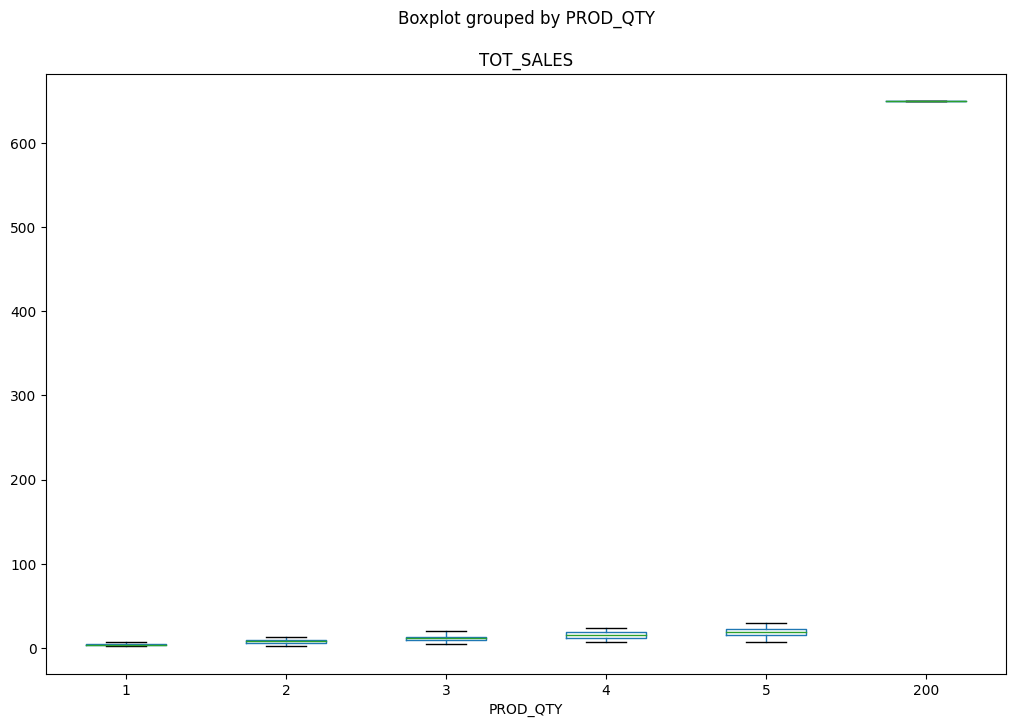

In [292]:
# checking for Outliers
chips_data.boxplot(by ='PROD_QTY', column =['TOT_SALES'], grid = False,figsize=(12,8))   # no outlier is observed

In [293]:
# product quantity appears to have an outlier which we should investigate further
chips_data.sort_values('PROD_QTY', ascending=False).head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
135225,2019-05-15,46,46296,42138,81,Pringles Original Crisps 134g,5,18.5
69523,2019-05-15,71,71142,69852,96,WW Original Stacked Chips 160g,5,9.5
69502,2018-08-18,55,55144,49328,44,Thins Chips Light& Tangy 175g,5,16.5
69496,2018-08-15,49,49303,45789,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
69486,2019-05-16,45,45006,40460,37,Smiths Thinly Swt Chli&S/Cream175G,5,15.0
69483,2018-08-15,43,43126,39445,25,Pringles SourCream Onion 134g,5,18.5
69474,2018-08-18,33,33138,30332,68,Pringles Chicken Salt Crips 134g,5,18.5
69472,2018-08-17,32,32193,29196,110,WW Original Corn Chips 200g,5,9.5


In [294]:
# Finding the loyalty car number
chips_data.sort_values('PROD_QTY', ascending=False).head(2)["LYLTY_CARD_NBR"]

,LYLTY_CARD_NBR
69763,226000
69762,226000


In [295]:
# Select rows where LYLTY_CARD_NBR is equal to 226000
rows_with_226000 = chips_data[chips_data['LYLTY_CARD_NBR'] == 226000]
rows_with_226000

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [296]:
# Filter out the customer based on the loyalty card number
chips_data=chips_data[chips_data['LYLTY_CARD_NBR'] != 226000]
chips_data.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2
10,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7


In [297]:
chips_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246740 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246740 non-null  datetime64[ns]
 1   STORE_NBR       246740 non-null  int64         
 2   LYLTY_CARD_NBR  246740 non-null  int64         
 3   TXN_ID          246740 non-null  int64         
 4   PROD_NBR        246740 non-null  int64         
 5   PROD_NAME       246740 non-null  object        
 6   PROD_QTY        246740 non-null  int64         
 7   TOT_SALES       246740 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB


In [298]:
chips_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,2018-12-30 01:18:58.448569344,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897


In [299]:
chips_data['DATE'].isnull().sum() # Checking null values

0

In [300]:
# Looking for number of transaction lines over time to see
value_counts_by_date = chips_data['DATE'].value_counts()  # Count occurrences of each date
value_counts_by_date.head(10)

,count
DATE,
2018-12-24,865
2018-12-23,853
2018-12-22,840
2018-12-19,839
2018-12-20,808
2018-12-18,799
2018-12-21,781
2019-06-07,762
2018-09-06,745


In [301]:
# Checking number of transactions per day
value_counts_by_date.info() # there are 364 days in data

<class 'pandas.core.series.Series'>
DatetimeIndex: 364 entries, 2018-12-24 to 2019-06-13
Series name: count
Non-Null Count  Dtype
--------------  -----
364 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


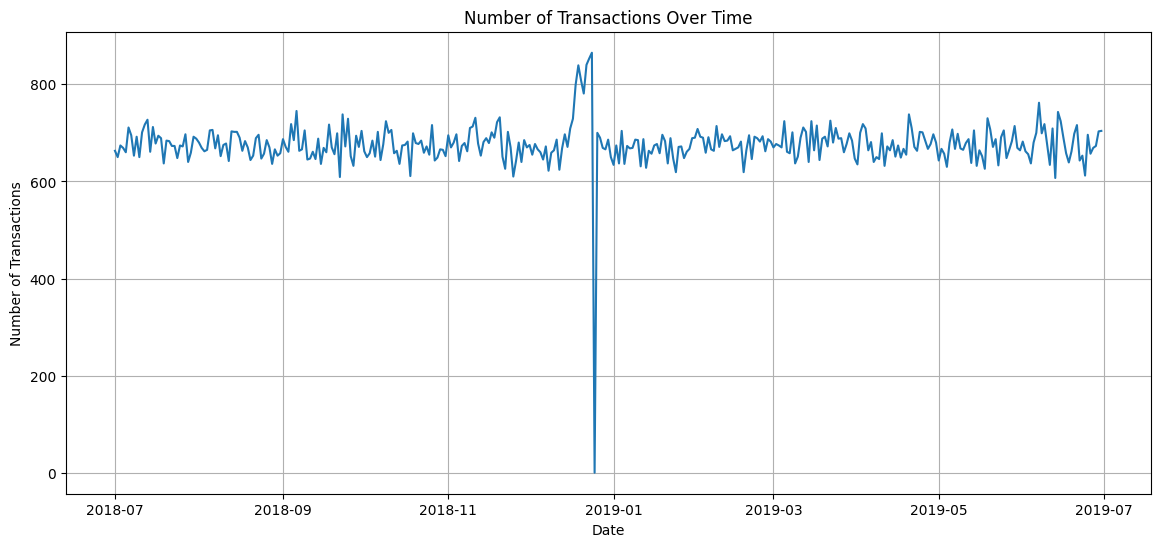

In [302]:
# Create a date range from 1 July 2018 to 30 June 2019
date_range = pd.date_range(start='2018-07-01', end='2019-06-30')


# Create a DataFrame with this date range as the index
date_df = pd.DataFrame(index=date_range)


# Group the transactions by date and count the number of transactions for each date
daily_transactions = chips_data.groupby('DATE')['DATE'].count()


# Join the daily_transactions series with the date_df DataFrame
merged_df= date_df.join(daily_transactions, how='left')

# Rename the column with transaction counts
merged_df= merged_df.rename(columns={ 'DATE':'TransactionCount'})

# Fill missing values (NaNs) with 0 if needed
merged_df['TransactionCount'] = merged_df['TransactionCount'].fillna(0)

# Create a chart of number of transactions over time
plt.figure(figsize=(14, 6))
plt.plot(merged_df.index, merged_df['TransactionCount'])
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions Over Time')
plt.grid(True)
plt.show()

In [303]:
# Finding date for the missing Transaction count as zero
merged_df[merged_df['TransactionCount']==0]

,TransactionCount
2018-12-25,0.0


In [304]:
# Filter data for December month
december_data = merged_df[merged_df.index.month == 12] # Access the index using .index
december_data.head(10)


,TransactionCount
2018-12-01,675.0
2018-12-02,655.0
2018-12-03,677.0
2018-12-04,666.0
2018-12-05,660.0
2018-12-06,645.0
2018-12-07,672.0
2018-12-08,622.0
2018-12-09,659.0
2018-12-10,664.0


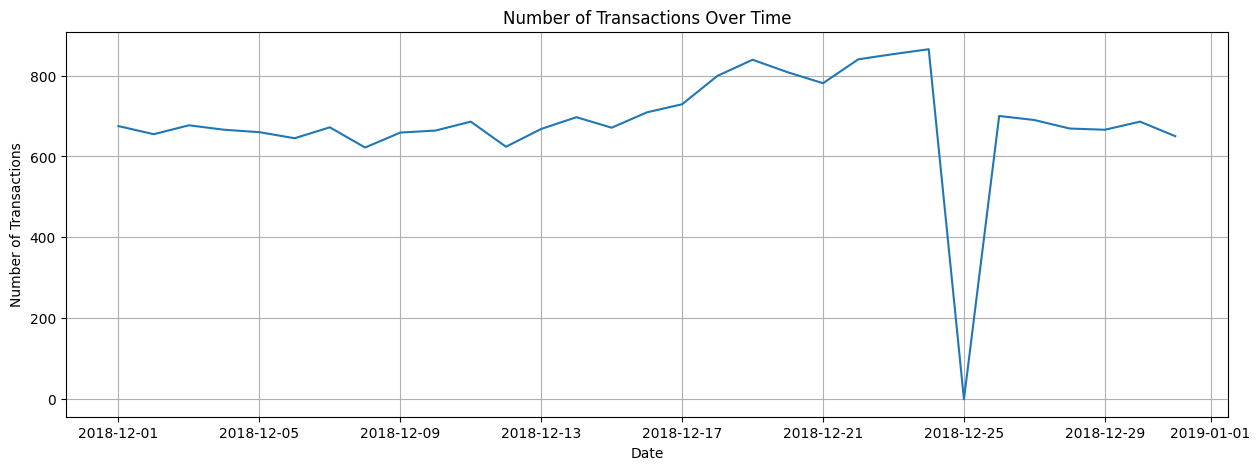

In [305]:
# Create a chart of number of transactions over time for DECEMBER MONTH
plt.figure(figsize=(15, 5))
plt.plot(december_data.index, december_data['TransactionCount']) # Use .index to access the index values
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions Over Time')
plt.grid(True)
plt.show()

 ### **We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on Christmas day itself. This is due to shops being closed on Christmas day.**

In [306]:
# Extract from number from PROD_NUM description as product size

import re

def extract_product_size(prod_num):
  """Extracts the product size from the PROD_NUM description."""
  match = re.search(r'\d+', prod_num)  # Find the first sequence of digits
  if match:
    return int(match.group(0))
  else:
    return None  # Or handle cases where no digits are found

# Apply the function to the PROD_NUM column
chips_data['Pack_Size'] = chips_data['PROD_NAME'].apply(extract_product_size)

# Display the updated DataFrame
chips_data.head()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_Size
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [307]:
# Largest pack size
chips_data["Pack_Size"].max()

380

In [308]:
# Smallest pack size
chips_data["Pack_Size"].min()

70

In [309]:
chips_data["Pack_Size"].value_counts()

,count
Pack_Size,
175,66390
150,40203
134,25102
110,22387
170,19983
165,15297
330,12540
380,6416
270,6285


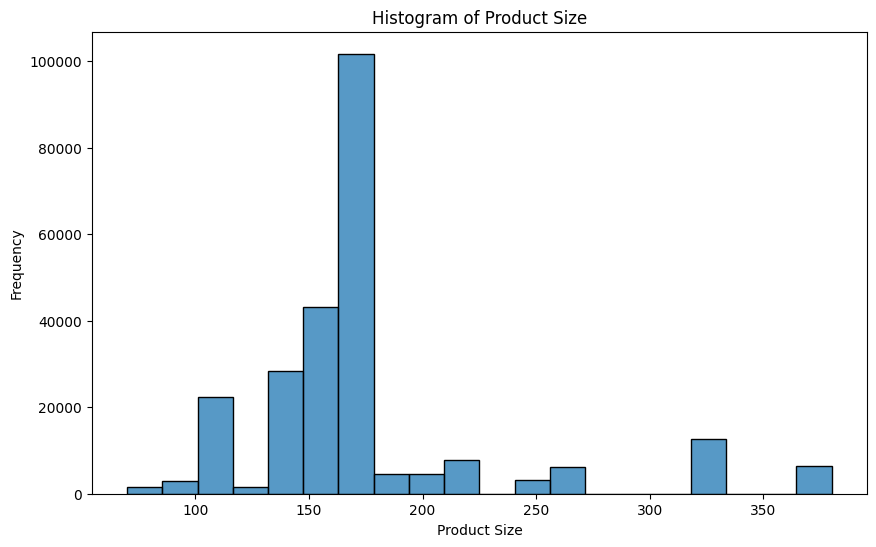

In [310]:
# Histogram for Product_Size (Distribution of data)

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(chips_data['Pack_Size'], bins=20)
plt.xlabel('Product Size')
plt.ylabel('Frequency')
plt.title('Histogram of Product Size')
plt.show()


In [311]:
# Brand Name From Prod_name
chips_data['Brand_Name'] = chips_data['PROD_NAME'].str.split().str[0]
chips_data.head(10)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_Size,Brand_Name
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330,Smiths
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,210,Grain
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,150,Doritos
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,210,Grain
10,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330,Smiths


In [312]:
# Unique brand name
chips_data['Brand_Name'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

In [313]:
# Renaming brand name RRD change to Red

chips_data['Brand_Name'] = chips_data['Brand_Name'].replace('RRD', 'Red')
chips_data.head(10)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_Size,Brand_Name
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330,Smiths
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,210,Grain
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,150,Doritos
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,210,Grain
10,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330,Smiths


In [314]:
# checking names
chips_data['Brand_Name'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'Tostitos', 'Cheetos', 'Woolworths',
       'Snbts', 'Sunbites'], dtype=object)

In [315]:
# Preferred brand of chips
chips_data['Brand_Name'].value_counts()

#Brands with higest transactions coiunt are Kettle, Smiths, Pringles , Doritos

,count
Brand_Name,
Kettle,41288
Smiths,27390
Pringles,25102
Doritos,22041
Red,16321
Thins,14075
Infuzions,11057
WW,10320
Cobs,9693


> ## **Customer Data**

In [316]:
# Importing customer data
pur=pd.read_csv("/content/QVI_purchase_behaviour.csv")
pur.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [317]:
pur.shape

(72637, 3)

> ### **EDA and Data Transformation for Customer data :**

In [318]:
pur.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [319]:
# Descriptive Information
pur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [320]:
pur['LIFESTAGE'].value_counts()

# Observation - Most of the customers are retirees, followed by older singles/couples. Size of the new families is the least.

,count
LIFESTAGE,
RETIREES,14805
OLDER SINGLES/COUPLES,14609
YOUNG SINGLES/COUPLES,14441
OLDER FAMILIES,9780
YOUNG FAMILIES,9178
MIDAGE SINGLES/COUPLES,7275
NEW FAMILIES,2549


In [321]:
# Total numbers of unique customers
pur['LYLTY_CARD_NBR'].nunique()

72637

In [322]:
# Customer count for PREMIUM_CUSTOMER
pur1=pur['PREMIUM_CUSTOMER'].value_counts()
pur1

,count
PREMIUM_CUSTOMER,
Mainstream,29245
Budget,24470
Premium,18922


### **As expected, premium customers are less in number than Mainstream and Budget**



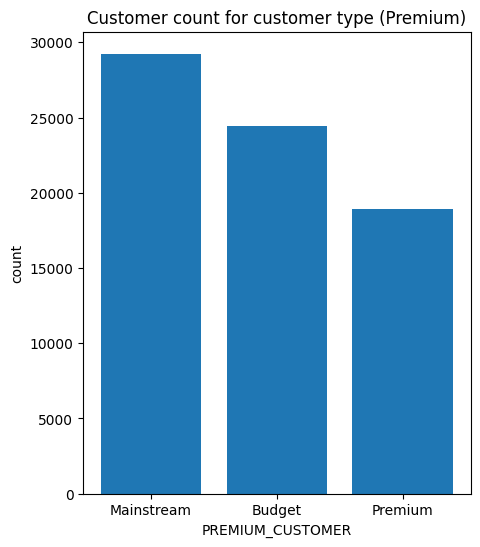

In [323]:
#  Plot the bar chart

plt.figure(figsize=(5, 6))
plt.bar(pur1.index, pur1.values)
plt.xlabel('PREMIUM_CUSTOMER')
plt.ylabel('count')
plt.title('Customer count for customer type (Premium)')
plt.show()


> ## **Data Merging**

In [324]:
# merging data using left join (help us to check for zero customers with zero transactions)
data=pd.merge(chips_data,pur,on="LYLTY_CARD_NBR",how="left")
data.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_Size,Brand_Name,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget
5,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330,Smiths,MIDAGE SINGLES/COUPLES,Budget
6,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,210,Grain,MIDAGE SINGLES/COUPLES,Budget
7,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,150,Doritos,MIDAGE SINGLES/COUPLES,Budget
8,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,210,Grain,MIDAGE SINGLES/COUPLES,Budget
9,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [325]:
# Descriptive summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246740 entries, 0 to 246739
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  datetime64[ns]
 1   STORE_NBR         246740 non-null  int64         
 2   LYLTY_CARD_NBR    246740 non-null  int64         
 3   TXN_ID            246740 non-null  int64         
 4   PROD_NBR          246740 non-null  int64         
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  int64         
 7   TOT_SALES         246740 non-null  float64       
 8   Pack_Size         246740 non-null  int64         
 9   Brand_Name        246740 non-null  object        
 10  LIFESTAGE         246740 non-null  object        
 11  PREMIUM_CUSTOMER  246740 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 22.6+ MB


In [326]:
# Informative summary
data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,Pack_Size
count,246740,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000,246740.000000
mean,2018-12-30 01:18:58.448569344,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113,175.583521
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,70.000000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000,150.000000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000,170.000000
75%,2019-03-31 00:00:00,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000,175.000000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,380.000000
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897,59.432118


In [327]:
# Checking null values
data.isnull().sum()

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0
Pack_Size,0
Brand_Name,0


> # **Data Analysis**

### **After Data cleaning and Processing answer the following question for Analysis of Customer Purchasing Behaviour :**

To find answers to questions like:

- **Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is?**

- **How many customers are in each segment ?**

- **How many chips are bought per customer by segment ?**

- **What's the average chip price by customer segment ?**




### **Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is?**

LIFESTAGE               PREMIUM_CUSTOMER
OLDER FAMILIES          Budget              156863.75
YOUNG SINGLES/COUPLES   Mainstream          147582.20
RETIREES                Mainstream          145168.95
YOUNG FAMILIES          Budget              129717.95
OLDER SINGLES/COUPLES   Budget              127833.60
                        Mainstream          124648.50
                        Premium             123537.55
RETIREES                Budget              105916.30
OLDER FAMILIES          Mainstream           96413.55
RETIREES                Premium              91296.65
YOUNG FAMILIES          Mainstream           86338.25
MIDAGE SINGLES/COUPLES  Mainstream           84734.25
YOUNG FAMILIES          Premium              78571.70
OLDER FAMILIES          Premium              75242.60
YOUNG SINGLES/COUPLES   Budget               57122.10
MIDAGE SINGLES/COUPLES  Premium              54443.85
YOUNG SINGLES/COUPLES   Premium              39052.30
MIDAGE SINGLES/COUPLES  Budget           

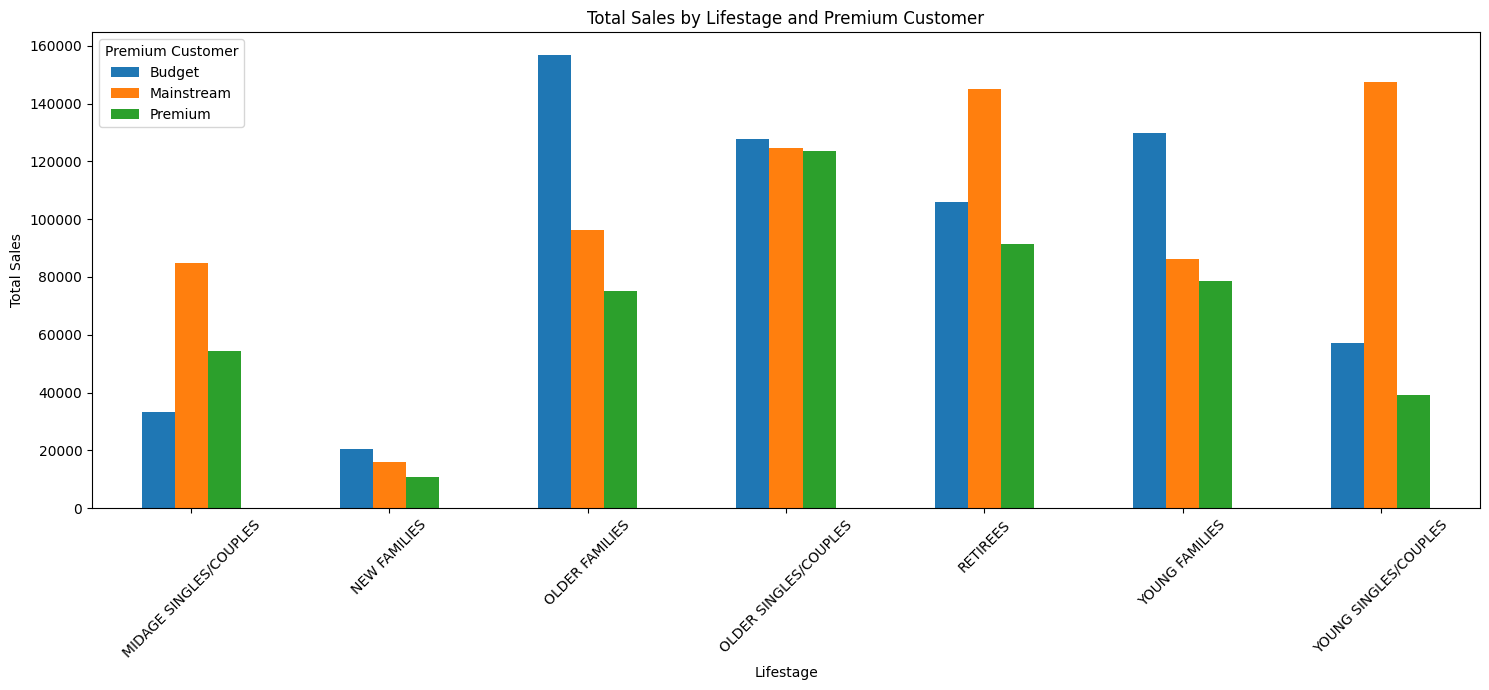

In [328]:
# sum total sales by LIFESTAGE	and PREMIUM_CUSTOMER descending

# Group by 'LIFESTAGE' and 'PREMIUM_CUSTOMER', sum 'TOT_SALES'
sales_by_customer = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum()

# Sort the result in descending order
sorted_sales = sales_by_customer.sort_values(ascending=False)

print(sorted_sales)

# clustered plot total sales  with LIFESTAGE and PREMIUM_CUSTOMER

# Group by 'LIFESTAGE' and 'PREMIUM_CUSTOMER', sum 'TOT_SALES'
sales_by_customer = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum()

# Create a clustered bar plot
sales_by_customer.unstack().plot(kind='bar', figsize=(15, 7))

plt.title('Total Sales by Lifestage and Premium Customer')
plt.xlabel('Lifestage')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer')
plt.tight_layout()
plt.show()

### **Insight :**

- The highest total sales come from the "Older Families" segment, particularly within the "Mainstream" customer category. This is followed by strong sales from "Midage Singles/Couples" and "Young Singles/Couples" in the "Mainstream" segment.

### **Interpretation :**

- The mainstream segment, particularly among older families, is a key driver of sales. Focusing marketing efforts on this segment may yield higher returns. Additionally, targeting midage and young singles/couples could help boost sales further, especially in the mainstream category.


#### **As OLDER FAMILIES, YOUNG SINGLES/COUPLES and RETIREES are the highest consumer for chips looking for preferred brand for this group**

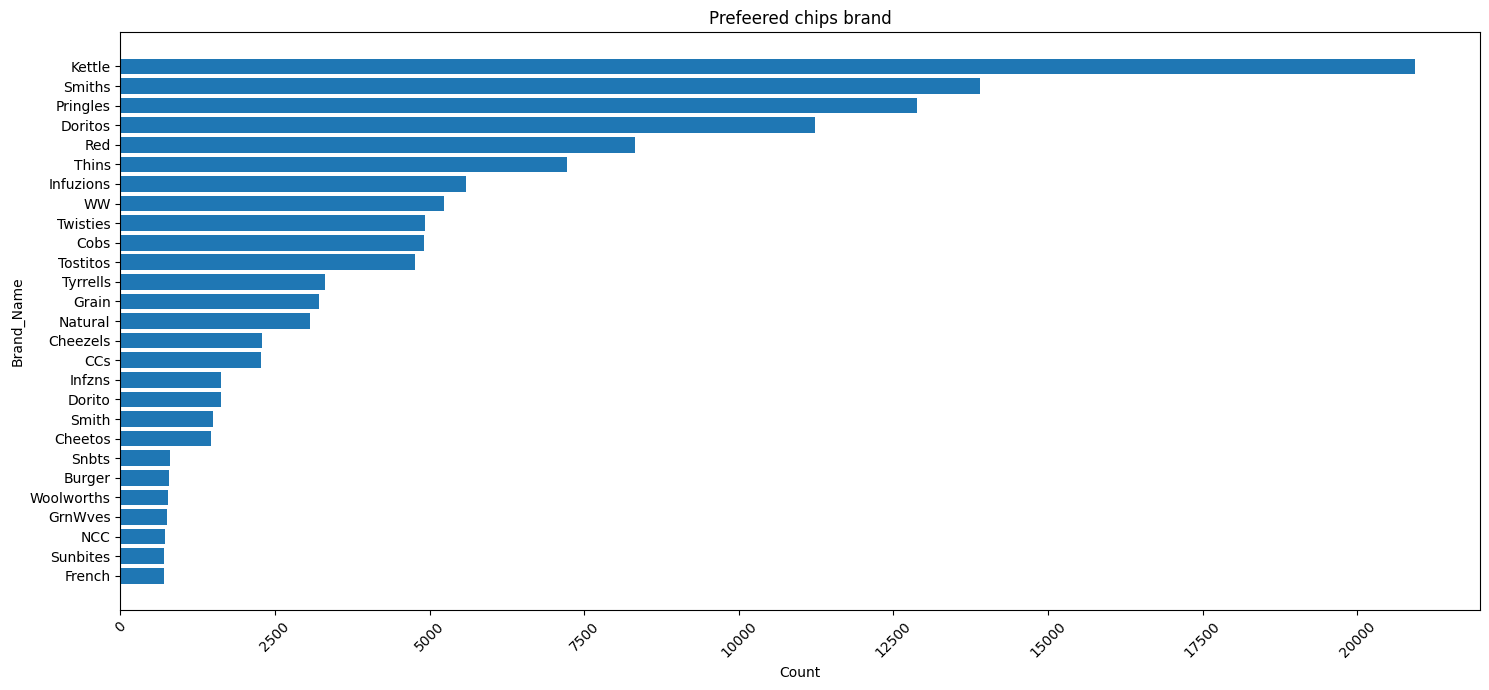

In [355]:
# filter data for lifestyle OLDER FAMILIES' or YOUNG SINGLES/COUPLES ,RETIREES

# Filter data for 'OLDER FAMILIES', 'YOUNG SINGLES/COUPLES', and 'RETIREES'
filtered_data = data[data['LIFESTAGE'].isin(['OLDER FAMILIES', 'YOUNG SINGLES/COUPLES', 'RETIREES'])]

# Display the first few rows of the filtered data
brand_counts = filtered_data['Brand_Name'].value_counts().sort_values(ascending=True)


# Create a bar plot
plt.figure(figsize=(15, 7))
# Use brand_counts index and values for plotting
plt.barh(brand_counts.index, brand_counts.values)
plt.title('Prefeered chips brand')
plt.xlabel('Count')
plt.ylabel('Brand_Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **As Older Families or Young Singles/Couples and Retirees are the highest consumer for chips looking for preferred brand pack size for this group**

Pack_Size
175    33613
150    20405
134    12879
110    11376
170    10199
165     7811
330     6447
380     3268
270     3253
210     3217
200     2262
250     1676
135     1616
90      1518
160     1509
190     1482
220      787
70       756
180      754
125      730
Name: count, dtype: int64


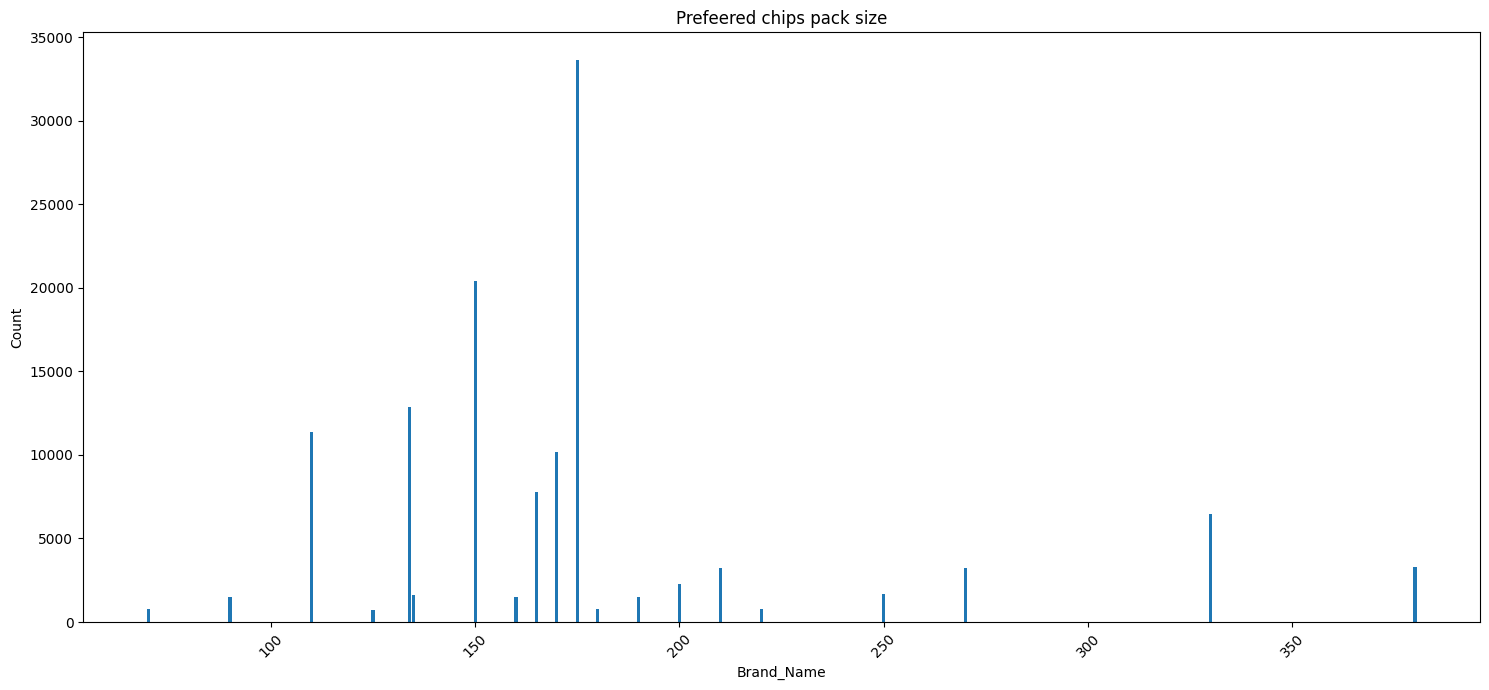

In [363]:
# filter data for lifestyle OLDER FAMILIES' or YOUNG SINGLES/COUPLES ,RETIREES

# Filter data for 'OLDER FAMILIES', 'YOUNG SINGLES/COUPLES', and 'RETIREES'
filtered_data = data[data['LIFESTAGE'].isin(['OLDER FAMILIES', 'YOUNG SINGLES/COUPLES', 'RETIREES'])]

# Display the first few rows of the filtered data
brand_counts = filtered_data['Pack_Size'].value_counts().sort_values(ascending=False)
print(brand_counts)

# Create a bar plot
plt.figure(figsize=(15, 7))
# Use brand_counts index and values for plotting
plt.bar(brand_counts.index, brand_counts.values)
plt.title('Prefeered chips pack size')
plt.xlabel('Brand_Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Preferred pack size is 175g followed by 150 and 134g for lifestyle as  Older Families' or Young Singles/Couples and Retirees and pack size is between  134 g and 175 g are more perferered than other pack size


### **How many customers are in each segment ?**

LIFESTAGE
MIDAGE SINGLES/COUPLES    23398
NEW FAMILIES               6497
OLDER FAMILIES            45158
OLDER SINGLES/COUPLES     50793
RETIREES                  46431
YOUNG FAMILIES            40494
YOUNG SINGLES/COUPLES     33969
Name: LIFESTAGE, dtype: int64


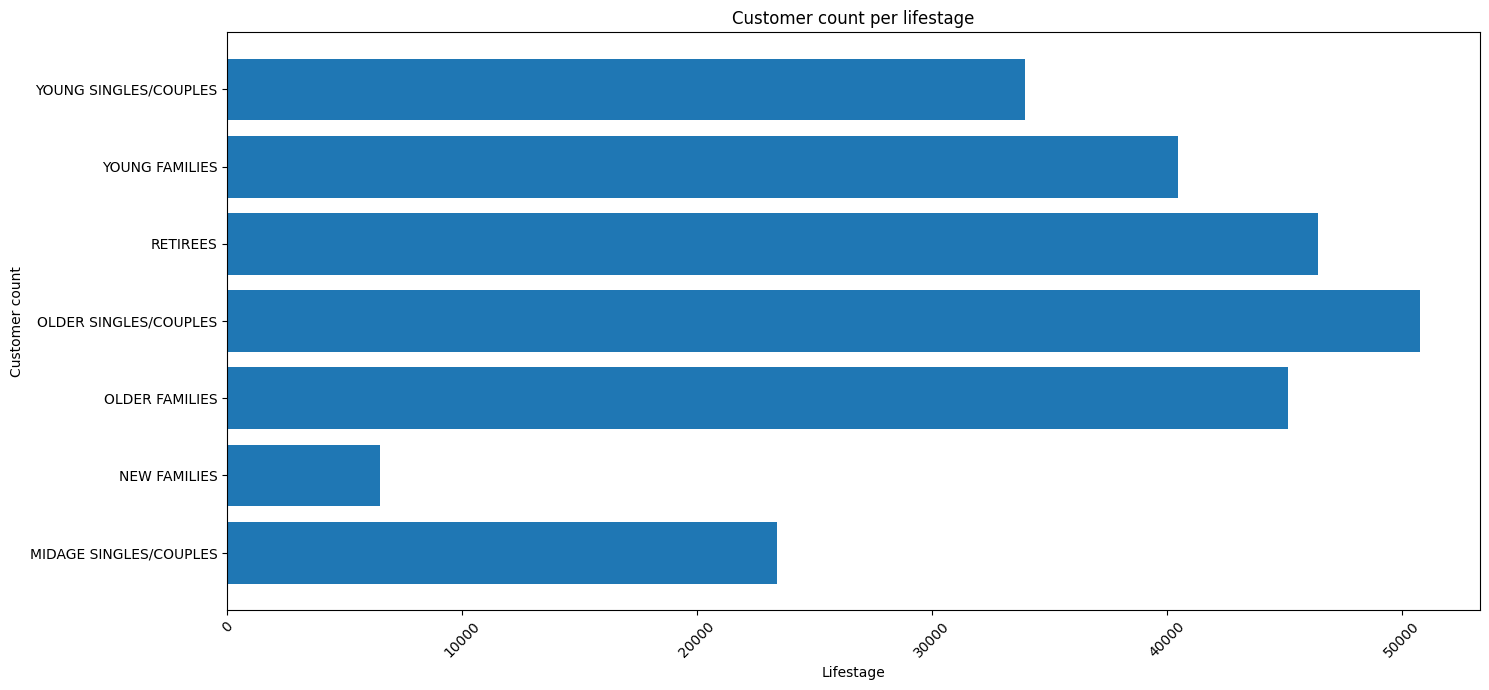

In [329]:
# Group by 'LIFESTAGE' and count occurrences
customer_lifestage = data.groupby('LIFESTAGE')['LIFESTAGE'].count()
print(customer_lifestage)
#This uses count to determine the occurrences of each unique LIFESTAGE

# Create a bar plot
plt.figure(figsize=(15, 7))
plt.barh(customer_lifestage.index, customer_lifestage.values)
plt.title('Customer count per lifestage')
plt.xlabel('Lifestage')
plt.ylabel('Customer count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Older singles/Couples and Retirees and Older Families are highest customer count by lifestage and new families are having least customer count**

PREMIUM_CUSTOMER
Budget        86762
Mainstream    95043
Premium       64935
Name: PREMIUM_CUSTOMER, dtype: int64


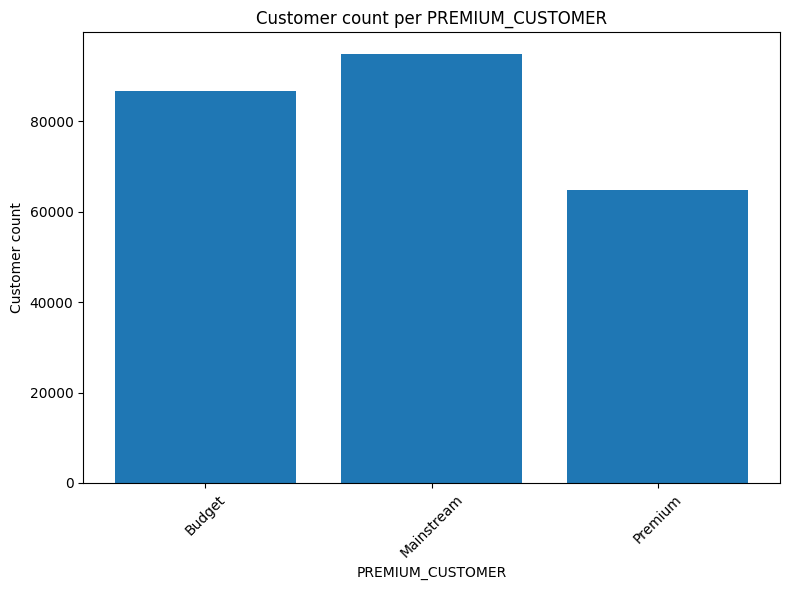

In [330]:
# Group by 'LIFESTAGE' and count occurrences
customer_lifestage = data.groupby('PREMIUM_CUSTOMER')['PREMIUM_CUSTOMER'].count()
print(customer_lifestage)

#This uses count to determine the occurrences of each unique LIFESTAGE

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(customer_lifestage.index, customer_lifestage.values)
plt.title('Customer count per PREMIUM_CUSTOMER')
plt.xlabel('PREMIUM_CUSTOMER')
plt.ylabel('Customer count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Mainstream has highest customer count than budget and premium has lowest customer count**


### **How many chips are bought per customer by segment ?**

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget              1.89
                        Mainstream          1.91
                        Premium             1.89
NEW FAMILIES            Budget              1.86
                        Mainstream          1.86
                        Premium             1.86
OLDER FAMILIES          Budget              1.95
                        Mainstream          1.95
                        Premium             1.95
OLDER SINGLES/COUPLES   Budget              1.91
                        Mainstream          1.91
                        Premium             1.91
RETIREES                Budget              1.89
                        Mainstream          1.89
                        Premium             1.90
YOUNG FAMILIES          Budget              1.94
                        Mainstream          1.94
                        Premium             1.94
YOUNG SINGLES/COUPLES   Budget              1.81
                        Main

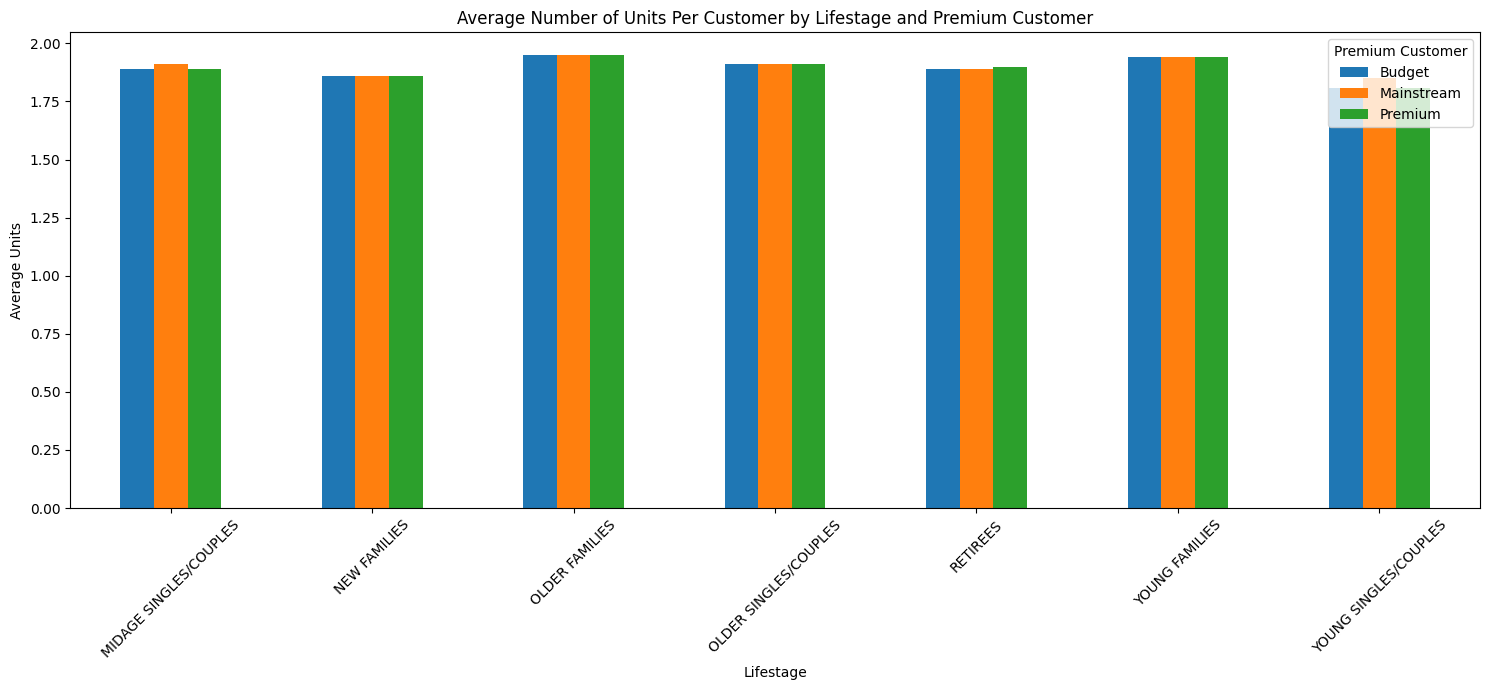

In [331]:
# round to 2 decimal average number of units per customer by those LIFESTAGE', 'PREMIUM_CUSTOMER

avg_units_per_customer = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().round(2)
print(avg_units_per_customer)

avg_units_per_customer.unstack().plot(kind='bar', figsize=(15, 7))

plt.title('Average Number of Units Per Customer by Lifestage and Premium Customer')
plt.xlabel('Lifestage')
plt.ylabel('Average Units')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer')
plt.tight_layout()
plt.show()

### **Insight :**
- Across different customer lifestages (e.g., midage singles/couples, older families, young families), the average number of units purchased per customer remains relatively consistent across budget, mainstream, and premium segments.


### **Interpretation :**
-  This suggests that purchasing behavior, in terms of quantity, does not significantly vary with the customer's spending category. Regardless of being in the budget, mainstream, or premium segments, customers from different life stages tend to purchase a similar number of units.


### **What's the average chip price by customer segment ?**

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget              3.75
                        Mainstream          3.99
                        Premium             3.78
NEW FAMILIES            Budget              3.93
                        Mainstream          3.94
                        Premium             3.89
OLDER FAMILIES          Budget              3.75
                        Mainstream          3.74
                        Premium             3.72
OLDER SINGLES/COUPLES   Budget              3.89
                        Mainstream          3.82
                        Premium             3.90
RETIREES                Budget              3.93
                        Mainstream          3.85
                        Premium             3.92
YOUNG FAMILIES          Budget              3.76
                        Mainstream          3.72
                        Premium             3.76
YOUNG SINGLES/COUPLES   Budget              3.69
                        Main

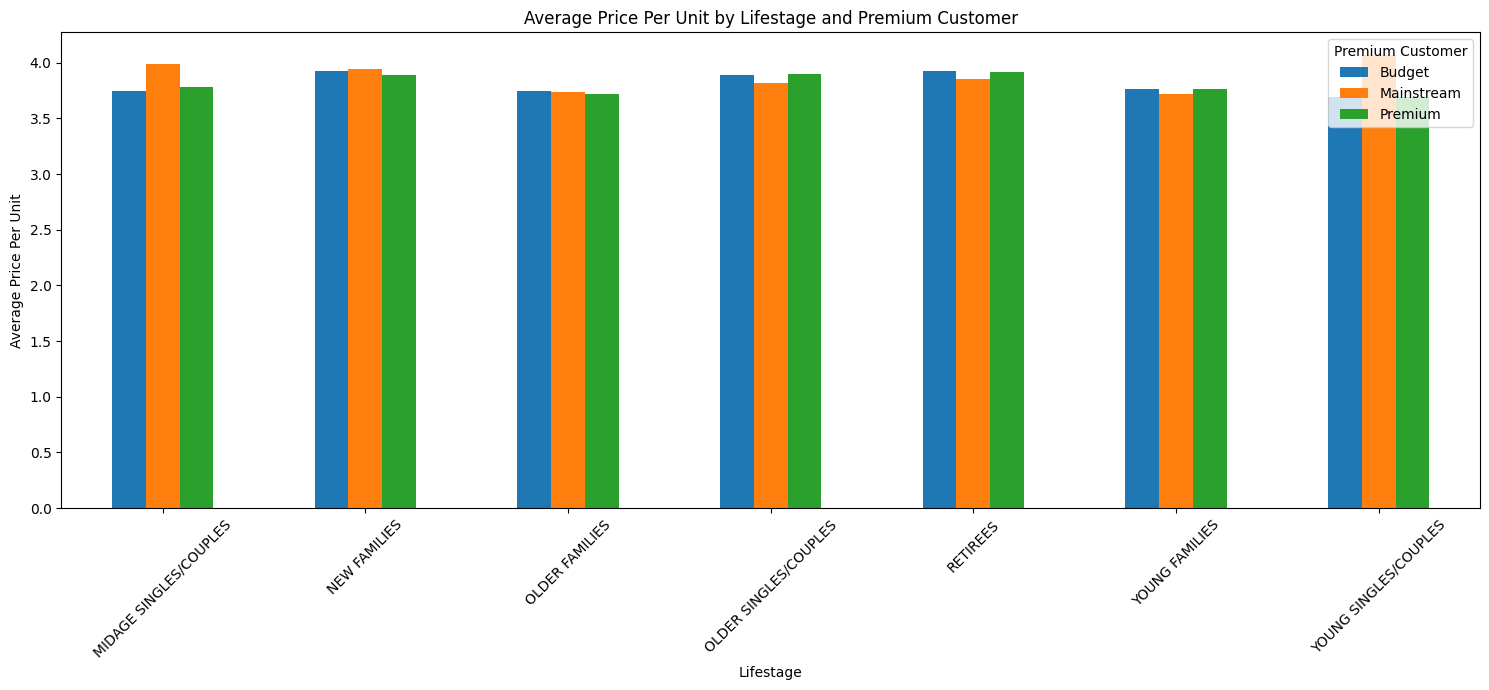

In [332]:

# Calculate the average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
avg_price_per_unit = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum() / data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum()
avg_price_per_unit = avg_price_per_unit.round(2)

print(avg_price_per_unit)

# Create a clustered bar plot
avg_price_per_unit.unstack().plot(kind='bar', figsize=(15, 7))

plt.title('Average Price Per Unit by Lifestage and Premium Customer')
plt.xlabel('Lifestage')
plt.ylabel('Average Price Per Unit')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer')
plt.tight_layout()
plt.show()



### **Insight:**

- The average price per unit of chips is consistent across different lifestages and premium customer categories (Budget, Mainstream, and Premium). Across segments like "Midage Singles/Couples," "New Families," and "Older Families," the average price per unit hovers around a similar range, with slight variations between the customer types.
  
### **Interpretation:**

- This consistency suggests that the pricing strategy for chips does not significantly differ across customer spending segments or lifestages. Therefore, any promotions or price adjustments would likely impact all customer segments similarly. It could be more effective to focus on product bundling or promotional campaigns rather than price adjustments to drive volume sales within targeted customer segments.

### **Perform an independent t-test between mainstream vs premium**

In [333]:
# Performing independent t-test between mainstream vs premium for unit price

from scipy import stats

# Filter data for mainstream and premium customers
mainstream_data = data[data['PREMIUM_CUSTOMER'] == 'Mainstream']
premium_data = data[data['PREMIUM_CUSTOMER'] == 'Premium']

# Calculate unit price for each transaction
mainstream_data['Unit_Price'] = mainstream_data['TOT_SALES'] / mainstream_data['PROD_QTY']
premium_data['Unit_Price'] = premium_data['TOT_SALES'] / premium_data['PROD_QTY']

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(mainstream_data['Unit_Price'], premium_data['Unit_Price'])

print(f"T-statistic: {t_statistic.round(2)}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
  print("There is a statistically significant difference in unit price between mainstream and premium customers.")
else:
  print("There is no statistically significant difference in unit price between mainstream and premium customers.")


T-statistic: 11.1
P-value: 1.3420572458727282e-28
There is a statistically significant difference in unit price between mainstream and premium customers.


### **Insights From the Independent T-Test Between Mainstream and Premium Customers:**

### **T-Statistic Interpretation**:

   - The T-statistic value of **11.1** indicates that the difference in unit prices between mainstream and premium customers is substantial.

   - High T-statistic values like this suggest that the means of the two groups are quite different from each other.

### **P-Value Analysis**:
   - The p-value is **1.34E-28**, which is significantly lower than the common significance level of **0.05**.

   - This implies that the difference in unit prices between the two groups is not due to random chance but rather is statistically significant.

###**Conclusion**:

   - Given the results, **there is a statistically significant difference in unit prices between mainstream and premium customers**.

   - This means that on average, the price paid per unit by mainstream customers is significantly different from that paid by premium customers.


### **Perform an independent t-test between budget midage and young singles and couples**

In [341]:
# Perform an independent t-test between budget midage and young singles and couples

from scipy import stats

# Filter data for budget midage and young singles/couples
budget_midage_data = data[(data['PREMIUM_CUSTOMER'] == 'Budget') & (data['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES')]
young_singles_couples_data = data[(data['PREMIUM_CUSTOMER'] == 'Budget') & (data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')]

# Calculate unit price for each transaction
budget_midage_data['Unit_Price'] = budget_midage_data['TOT_SALES'] / budget_midage_data['PROD_QTY']
young_singles_couples_data['Unit_Price'] = young_singles_couples_data['TOT_SALES'] / young_singles_couples_data['PROD_QTY']


# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(budget_midage_data['Unit_Price'], young_singles_couples_data['Unit_Price'])

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
  print("There is a statistically significant difference in unit price between budget midage and young singles/couples.")
else:
  print("There is no statistically significant difference in unit price between budget midage and young singles/couples.")


T-statistic: 4.3323761417023485
P-value: 1.4859368284556205e-05
There is a statistically significant difference in unit price between budget midage and young singles/couples.


### **Insights from the Independent T-Test Between Budget Midage and Young Singles/Couples :**

The data are filtered for **Budget Midage Singles/Couples** and **Budget Young Singles/Couples**.


- **T-Statistic and P-Value**:
   - **T-statistic**: 4.33
   - **P-value**: 1.49e-05

- **Conclusion**:
   - Since the **P-value** is much lower than the significance level (α = 0.05), we can conclude that:
   - **There is a statistically significant difference in unit price between budget midage and young singles/couples.**

- **Interpretation**:
   - The positive T-statistic suggests that the average unit price for one group is significantly higher than the other.
   - This finding indicates that marketing strategies or pricing policies may need to be adjusted based on the distinct purchasing behaviors of these segments.

This analysis can help guide strategic recommendations for targeted marketing and product offerings in the retail category.

### **Performing t test for the average pack size for the target segment (Young Singles/Couples, Mainstream) and rest of population**

In [272]:
# Calculate the average pack size for the target segment (Young Singles/Couples, Mainstream)
target_segment_avg_pack_size = data[(data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER'] == 'Mainstream')]['Pack_Size'].mean()

# Calculate the average pack size for the rest of the population
rest_of_population_avg_pack_size = data[~((data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER'] == 'Mainstream'))]['Pack_Size'].mean()

# Print the results
print(f"Average Pack Size for Target Segment (Young Singles/Couples, Mainstream): {target_segment_avg_pack_size:.2f}")
print(f"Average Pack Size for Rest of Population: {rest_of_population_avg_pack_size:.2f}")

# You can also perform a t-test to see if there's a statistically significant difference in pack size
# between the target segment and the rest of the population.
t_statistic, p_value = stats.ttest_ind(data[(data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER'] == 'Mainstream')]['Pack_Size'],
                                     data[~((data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER'] == 'Mainstream'))]['Pack_Size'])
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value}")

# Interpret the results of the t-test (if p-value is less than 0.05, there's a significant difference)

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
  print("There is a statistically significant difference in unit price between young singles/couples and other lifestages.")
else:
  print("There is no statistically significant difference in unit price between young singles/couples and other lifestages.")


Average Pack Size for Target Segment (Young Singles/Couples, Mainstream): 178.34
Average Pack Size for Rest of Population: 175.35
T-statistic: 6.77
P-value: 1.307573525715333e-11
There is a statistically significant difference in unit price between young singles/couples and other lifestages.


### **Average Pack Sizes :**

- Target Segment (Young Singles/Couples, Mainstream): 178.34
- Rest of Population: 175.35


### **T-Statistic and P-Value:

- T-statistic: 6.77
- P-value: 1.31e-11


### **Conclusion :**

- The P-value is significantly lower than the significance level (α = 0.05), leading to the conclusion that: There is a statistically significant difference in pack size between young singles/couples and other lifestages.


### **Interpretation :**

- The higher average pack size for the target segment suggests that young singles/couples in the mainstream category may prefer larger pack sizes compared to other lifestages.

- This could indicate differing consumption habits, potentially driven by lifestyle or family dynamics.

# **Recommendation :**

1. **Data-Driven Marketing Strategies**:
   - Utilize insights from data analyses to develop targeted marketing campaigns for each customer segment (e.g., Mainstream, Premium, Budget).
   - Highlight specific product features and benefits that resonate with the lifestyle and purchasing behavior of each segment.

2. **Customized Product Offerings**:
   - Tailor product sizes, packaging, and pricing strategies to meet the preferences of different lifestages (e.g., Young Singles/Couples, Midage Families).
   - Consider introducing exclusive products or limited-time offers for segments showing higher average sales or unit prices.

3. **Promotional Strategies**:
   - Implement promotions that align with the preferences of each customer segment, such as bundle deals for families or loyalty discounts for premium customers.
   - Use social media and digital marketing to engage younger demographics effectively, showcasing products that cater to their specific needs and preferences.

4. **Customer Experience Enhancement**:
   - Improve the shopping experience by offering personalized recommendations based on purchasing behavior, which could encourage repeat purchases.
   - Gather customer feedback to continuously refine product offerings and customer service strategies.

5. **Cross-Selling Opportunities**:
   - Analyze purchasing patterns to identify potential cross-selling opportunities within customer segments. For example, promote complementary products to the Midage Families segment.

6. **Segmentation and Analysis**:
   - Continue conducting regular data analyses to monitor changes in consumer behavior and preferences over time.
   - Leverage advanced analytics techniques to gain deeper insights into customer segments, enhancing the ability to respond to market trends swiftly.

7. **Training and Development**:
   - Provide training to sales and marketing teams on the insights derived from data analysis to ensure they understand the unique needs of different customer segments.
   - Foster a culture of data-driven decision-making within the organization, emphasizing the importance of leveraging analytics for strategic initiatives.

8. **Future Research**:
   - Consider conducting additional qualitative research (e.g., surveys or focus groups) to explore customer motivations and attitudes toward different product categories.
   - Investigate the impact of external factors, such as economic conditions or seasonal trends, on customer purchasing behavior and adjust strategies accordingly.

By implementing these recommendations, the organization can better align its products and marketing strategies with the preferences and behaviors of its diverse customer segments, ultimately driving sales and enhancing customer satisfaction.

# **Conclusion :**

In conclusion, the analysis of customer purchasing behaviors across various segments reveals significant insights that can drive strategic decision-making. The independent t-tests conducted between different customer groups, such as Mainstream versus Premium and Budget Midage versus Young Singles/Couples, indicate statistically significant differences in unit prices and average pack sizes.

These findings suggest that distinct marketing strategies and product offerings tailored to each segment can enhance engagement and drive sales. For example, the Premium segment commands higher unit prices, highlighting the opportunity for premium product positioning and exclusive offerings. Conversely, the Budget segment demonstrates sensitivity to pricing, indicating a need for cost-effective solutions and promotional strategies.

Moreover, the average pack size analysis emphasizes the potential for product customization to meet the specific needs of target demographics like Young Singles/Couples. Understanding these nuances allows for a more nuanced approach to market segmentation, which can ultimately lead to improved customer satisfaction and loyalty.

Overall, leveraging data analytics to inform marketing strategies, product development, and customer engagement initiatives will be crucial for effectively addressing the unique preferences of each customer segment and driving business growth in a competitive landscape. By continuously monitoring and adapting to consumer trends, the organization can ensure it remains responsive and relevant in the evolving market.